In [19]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

folder = '../../LastGridsearch'

csvs = []

count_nan = 0
for i, file in enumerate(os.listdir(folder + '/csvs')):
    df = pd.read_csv(folder + '/csvs' + '/' + file)
    if (df.batch_size == 64).any():
        df.rename(columns={'Unnamed: 0' : 'epoch'}, inplace=True)
        count_nan += df.shape[0] * df.shape[1] - np.sum(df.count())
        df['list_index'] = len(csvs)
        filename = file.split("_")
        # print(filename[0][-2:].isdigit())
        if filename[0][-2:].isdigit(): df['exp'] = filename[0][-2:]
        else: df['exp'] = filename[0][-1]
        csvs.append(df)

print(f"Total number of Nans: {count_nan}")

Total number of Nans: 0


In [20]:
nan_index = []
for i, df in enumerate(csvs):
    nan_index.append(list(df[(df['val_acc'].isnull()) | (df['train_acc'].isnull()) |(df['train_updates'].isnull()) | (df['val_updates'].isnull())].index))

print(nan_index)

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


In [21]:
# weird_acc = []
# for i, df in enumerate(csvs):
#     weird_acc.append(list(df[(df['val_acc']>1) | (df['val_acc']<0.1) | (df['train_acc']>1) | (df['train_acc']<0.1)].index))
# # for df in csvs:
# #     df.drop(df[(df['val_acc']>1) | (df['val_acc']<0)].index, inplace = True)
#
# see = [csvs[i].iloc[l[0]] for i, l in enumerate(weird_acc) if l]
#
# early_stopped_dfs = []
# for i in range(len(csvs)):
#     n = nan_index[i]
#     v = weird_acc[i]
#     if n and v:
#         early_stopped_dfs.append(csvs[i].iloc[[min(min(v), min(n))]])
#     elif n:
#         early_stopped_dfs.append(csvs[i].iloc[[min(n)]])
#     elif v:
#         early_stopped_dfs.append(csvs[i].iloc[[min(v)]])
#

In [22]:
# early_stopped = pd.concat(early_stopped_dfs)
# early_stopped.drop(columns=['val_acc', 'train_acc', 'val_updates', 'train_updates', 'early_stopping'], inplace=True)
# print("Networks that stopped early")
# early_stopped
# csvs[0].columns
# csvs[2]
# for df in csvs:
#     print(len(df))

In [23]:
# manual_early_stopping = {4: 36,5: 28, 12: 12, 14:27, 32:18, 35:23, 41:35, 46: 12,53:12}
#
# for key, val in manual_early_stopping.items():
#     csvs[key].drop(labels = range(val, 40), inplace=True)

In [24]:
big_df = pd.concat(csvs)
big_df.describe()

,epoch,batch_size,cost_per_sample,hidden_units,learning_rate,surprisal_cost,trial,val_acc,val_updates,train_acc,train_updates,list_index
count,4126.000000,4126.0,4126.00000,4126.0,4.126000e+03,4126.000000,4126.000000,4126.000000,4126.000000,4126.000000,4126.000000,4126.000000
mean,44.508483,64.0,0.00029,32.0,2.500000e-04,0.292523,0.985216,0.800814,194.040822,0.817989,203.554115,23.111246
std,26.986853,0.0,0.00041,0.0,1.084334e-19,0.427535,0.822428,0.067350,80.732328,0.077605,121.438596,13.671239
min,0.000000,64.0,0.00001,32.0,2.500000e-04,0.000000,0.000000,0.468550,6.203726,0.484575,6.159589,0.000000
25%,21.000000,64.0,0.00001,32.0,2.500000e-04,0.010000,0.000000,0.790465,148.369347,0.808694,151.754044,11.000000
50%,43.000000,64.0,0.00010,32.0,2.500000e-04,0.100000,1.000000,0.820212,211.042923,0.838909,211.512558,23.000000
75%,66.000000,64.0,0.00010,32.0,2.500000e-04,1.000000,2.000000,0.840645,258.597412,0.861846,259.044151,35.000000
max,99.000000,64.0,0.00100,32.0,2.500000e-04,1.000000,2.000000,0.860076,1587.473267,0.894431,2229.119873,46.000000


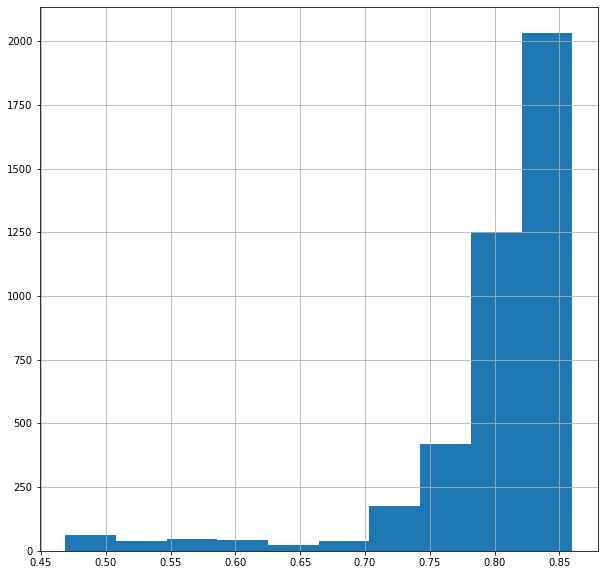

In [25]:
big_df['val_acc'].hist(figsize=(10, 10))

In [26]:
best_rows = []
best_accs = []
for df in csvs:
    best_accs.append(df.loc[:, 'val_acc'].max())
    best_rows.append(df.loc[df.loc[:, 'val_acc'].argmax()].to_dict())

In [27]:
best_df = pd.DataFrame(best_rows)
best_df = best_df.drop(columns= ["learning_rate", "hidden_units", "batch_size", "early_stopping"])

original = best_df[best_df['surprisal_cost'] == 0]
surprisal = best_df[best_df['surprisal_cost'] != 0]

In [28]:
print("No surprisal")
original

No surprisal


,epoch,cost_per_sample,surprisal_cost,trial,val_acc,val_updates,train_acc,train_updates,list_index,exp
0,78,0.00100,0.0,0,0.827925,83.491783,0.825254,78.086075,0,0
3,64,0.00001,0.0,0,0.860076,236.088135,0.870459,220.848419,3,12
7,62,0.00100,0.0,1,0.822616,78.107475,0.821448,75.205597,7,16
12,74,0.00010,0.0,1,0.850661,201.210037,0.875401,181.925674,12,20
16,76,0.00005,0.0,1,0.852464,169.999802,0.875534,171.122864,16,24
20,46,0.00001,0.0,1,0.838241,187.660858,0.841880,186.238846,20,28
25,49,0.00100,0.0,2,0.819511,84.393227,0.813435,78.617188,25,32
29,90,0.00010,0.0,2,0.848157,176.211441,0.864383,161.337601,29,36
34,90,0.00005,0.0,2,0.852664,204.058792,0.885751,199.139160,34,40
37,94,0.00001,0.0,2,0.857973,220.727570,0.878339,216.578995,37,44


In [29]:
print("With surprisal")
surprisal

With surprisal


,epoch,cost_per_sample,surprisal_cost,trial,val_acc,val_updates,train_acc,train_updates,list_index,exp
1,76,0.00005,0.10,0,0.856370,257.410645,0.886685,256.424011,1,10
2,70,0.00005,0.01,0,0.857572,206.600357,0.863849,202.653442,2,11
4,82,0.00001,1.00,0,0.855268,273.492584,0.877537,269.070862,4,13
5,85,0.00001,0.10,0,0.859075,259.792664,0.882145,258.979553,5,14
6,59,0.00001,0.01,0,0.853766,236.346252,0.857973,233.211212,6,15
8,98,0.00100,1.00,1,0.852965,250.222351,0.862313,249.674149,8,17
9,64,0.00100,0.10,1,0.827925,91.686699,0.828926,80.465942,9,18
10,61,0.00100,0.01,1,0.819111,79.707634,0.824386,81.062035,10,19
11,96,0.00100,1.00,0,0.850861,251.265625,0.873798,252.127411,11,1
13,96,0.00010,1.00,1,0.856971,251.753006,0.879006,250.925217,13,21


In [30]:
print("Dataframe with all best epochs for Validation accuracy")
best_df.sort_values(by='epoch')


Dataframe with all best epochs for Validation accuracy


,epoch,cost_per_sample,surprisal_cost,trial,val_acc,val_updates,train_acc,train_updates,list_index,exp
45,33,0.00005,0.00,0,0.844050,204.964249,0.841346,186.081726,45,8
17,39,0.00005,1.00,1,0.845252,261.027435,0.858974,260.409912,17,25
24,45,0.00001,0.01,1,0.847055,207.858170,0.851295,208.071243,24,31
20,46,0.00001,0.00,1,0.838241,187.660858,0.841880,186.238846,20,28
27,47,0.00100,0.10,2,0.822917,93.442009,0.810897,83.012817,27,34
25,49,0.00100,0.00,2,0.819511,84.393227,0.813435,78.617188,25,32
6,59,0.00001,0.01,0,0.853766,236.346252,0.857973,233.211212,6,15
32,59,0.00010,0.01,2,0.850561,170.047577,0.860377,163.016220,32,39
18,60,0.00005,0.10,1,0.852865,269.353760,0.863114,266.564636,18,26
10,61,0.00100,0.01,1,0.819111,79.707634,0.824386,81.062035,10,19


In [31]:
print("Dataframe with one per trials")
# mean_df = best_df.groupby(by=["cost_per_sample", "surprisal_cost"])
sorted = best_df.groupby(["cost_per_sample", "surprisal_cost"], sort="val_acc")
sorted.first()

Dataframe with one per trials


epoch  trial   val_acc  val_updates  \
cost_per_sample surprisal_cost                                        
0.00001         0.00               64      0  0.860076   236.088135   
                0.01               59      0  0.853766   236.346252   
                0.10               85      0  0.859075   259.792664   
                1.00               82      0  0.855268   273.492584   
0.00005         0.00               76      1  0.852464   169.999802   
                0.01               70      0  0.857572   206.600357   
                0.10               76      0  0.856370   257.410645   
                1.00               39      1  0.845252   261.027435   
0.00010         0.00               74      1  0.850661   201.210037   
                0.01               89      1  0.850160   155.191711   
                0.10               82      1  0.855869   254.620392   
                1.00               96      1  0.856971   251.753006   
0.00100         0.00               78      0  0.827925    83.491783   
                0.01               61      1  0.819111    79.707634   
                0.10               64      1  0.827925    91.686699   
                1.00               98      1  0.852965   250.222351   

                                train_acc  train_updates  list_index exp  
cost_per_sample surprisal_cost                                            
0.00001         0.00             0.870459     220.848419           3  12  
                0.01             0.857973     233.211212           6  15  
                0.10             0.882145     258.979553           5  14  
                1.00             0.877537     269.070862           4  13  
0.00005         0.00             0.875534     171.122864          16  24  
                0.01             0.863849     202.653442           2  11  
                0.10             0.886685     256.424011           1  10  
                1.00             0.858974     260.409912          17  25  
0.00010         0.00             0.875401     181.925674          12  20  
                0.01             0.873197     150.166595          15  23  
                0.10             0.879607     254.343155          14  22  
                1.00             0.879006     250.925217          13  21  
0.00100         0.00             0.825254      78.086075           0   0  
                0.01             0.824386      81.062035          10  19  
                0.10             0.828926      80.465942           9  18  
                1.00             0.862313     249.674149           8  17

In [32]:
# mean_df = mean_df.max()
# mean_df.sort_values(by='val_acc')
print("Clearer visualization")
# , axis=1, names=["acc_mean", "acc_std", "updates_mean", "updates_std"])
view = pd.DataFrame({'count': sorted.val_acc.count(),
                     'acc_mean': sorted.val_acc.mean(),
                     'acc_std': sorted.val_acc.std(),
                     'updates_mean': sorted.val_updates.mean(),
                     'updates_std': sorted.val_updates.std(),
                     'epoch_mean': sorted.epoch.mean()})
# view.rename(columns=["acc_mean", "acc_std", "updates_mean", "updates_std"])
view[view['acc_mean'] > 0.835]

Clearer visualization


count  acc_mean   acc_std  updates_mean  \
cost_per_sample surprisal_cost                                            
0.00001         0.00                3  0.852097  0.012045    214.825521   
                0.01                3  0.850995  0.003505    214.538595   
                0.10                3  0.856237  0.002570    263.550313   
                1.00                3  0.855836  0.003788    269.007670   
0.00005         0.00                3  0.849726  0.004916    193.007614   
                0.01                3  0.854834  0.005541    188.465342   
                0.10                2  0.854617  0.002479    263.382202   
                1.00                3  0.852364  0.006305    263.758779   
0.00010         0.00                3  0.849259  0.001279    187.587474   
                0.01                3  0.852264  0.003302    172.887721   
                0.10                3  0.854100  0.003065    256.334234   
                1.00                3  0.855202  0.001572    256.080429   
0.00100         1.00                3  0.850594  0.002515    248.680654   

                                updates_std  epoch_mean  
cost_per_sample surprisal_cost                           
0.00001         0.00              24.747241   68.000000  
                0.01              19.352457   61.333333  
                0.10               3.553557   86.333333  
                1.00               5.870964   74.333333  
0.00005         0.00              19.930493   66.333333  
                0.01              21.217281   75.000000  
                0.10               8.445058   68.000000  
                1.00               3.931146   67.000000  
0.00010         0.00              12.649807   75.666667  
                0.01              19.273671   78.000000  
                0.10               4.471512   84.333333  
                1.00               4.110700   96.333333  
0.00100         1.00               3.611668   87.000000

In [33]:
lr0001 = [csv for csv in csvs if csv['learning_rate'][0]==0.0001 and csv['hidden_units'][0]==32]

# temp = bs64_best.loc[(best_df['hidden_units']==96)]

In [34]:
if not os.path.exists(f"{folder}/plots"):
    os.makedirs(f"{folder}/plots")

for i, df in enumerate(csvs):
    df.loc[:, ['val_updates', 'train_updates']] = df[['val_updates', 'train_updates']]
    ax = df[['val_acc', 'train_acc', 'val_updates', 'train_updates']].plot(figsize= (30, 20))
    ax.set_ylim(0, 1)
    ax.get_figure().savefig(f"{folder}/plots/idx{i}_acc{round(best_accs[i], 2)}_cps{csvs[i].cost_per_sample[0]}_s{csvs[i].surprisal_cost[0]}_exp{csvs[i].exp[0]}.png")
    plt.clf()

C:\Users\emyms\anaconda3\envs\skiprnn-2017-telecombcn\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\emyms\anaconda3\envs\skiprnn-2017-telecombcn\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\emyms\anaconda3\envs\skiprnn-2017-telecombcn\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 fi

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

In [35]:
# if not os.path.exists(f"{folder}/lrplots"):
#     os.makedirs(f"{folder}/lrplots")
#
# for i, df in enumerate(lr0001):
#     df[['val_acc', 'train_acc']].plot().get_figure().savefig(f"{folder}/lrplots/idx{i}.png")
#

In [36]:
best_hyper = pd.concat(lr0001)

best_hyper_diff = best_hyper['val_acc'].diff(15)
best_hyper_diff.abs().mean()


ValueError: No objects to concatenate

In [ ]:
csvs[11]

best_df.sort_values(by='val_acc')